In [9]:
import pandas_gbq
import yfinance as yf
import pandas as pd

In [17]:
symbol = "SBFG3"

In [18]:
df = pandas_gbq.read_gbq(
f"""
select
    symbol, refdate, close
from
    `kyd-storage.layer2.tb_equities_adjusted_aux`
where
  symbol = '{symbol}'
""",
    "kyd-storage",
    progress_bar_type=None
)
df["refdate"] = pd.to_datetime(df["refdate"])
df = df.set_index("refdate")

In [19]:
yf_data = yf.download(f"{symbol}.SA", start="2016-01-01", progress=False)
yf_data.index = yf_data.index.tz_localize(None)

In [20]:
df_adj_comp = pd.concat([yf_data["Adj Close"], df["close"]], axis=1)
df_adj_comp.columns = ["yfinance", "WEL"]

<AxesSubplot: >

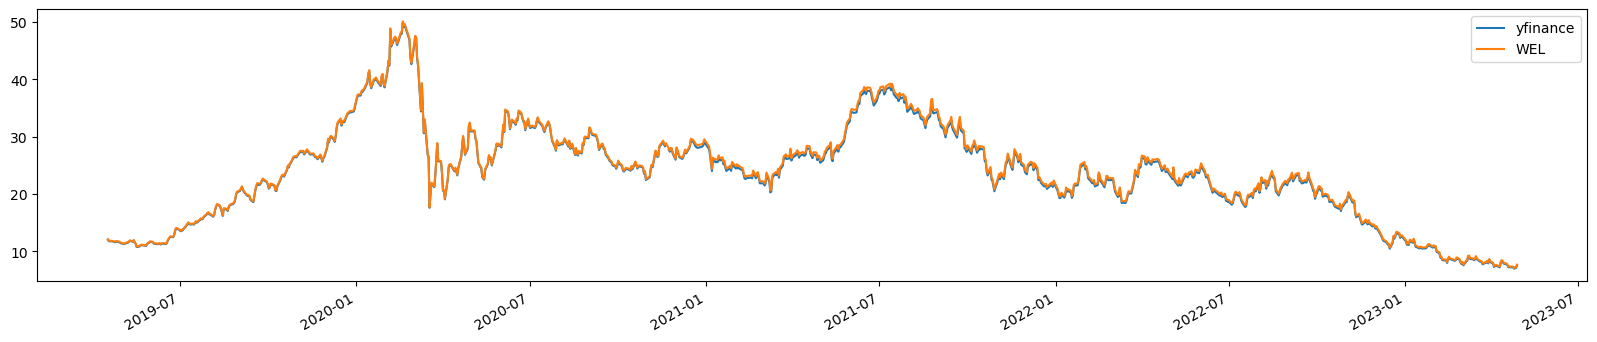

In [21]:
df_adj_comp.plot(figsize=(20,4))

In [22]:
import bizdays
cal = bizdays.Calendar.load("B3")
cal.isbizday(df_adj_comp[df_adj_comp.WEL.isna()].index)

[]

In [23]:
df_adj_comp

,yfinance,WEL
2019-04-17,12.023467,12.109303
2019-04-18,11.779087,11.863484
2019-04-22,11.730211,11.814844
2019-04-23,11.661785,11.746318
2019-04-24,11.593358,11.678189
...,...,...
2023-04-24,7.190547,7.320447
2023-04-25,6.974437,7.100834
2023-04-26,7.092315,7.220838
2023-04-27,7.141431,7.270662
